In [ ]:
import requests
import pandas as pd
import time

class Download_Rankings:
    """
    A class to download and save standings data for a specific league and season.
    """

    def __init__(self, api_token, league_code):
        """
        Initialize the class with the API token and league code.

        Parameters:
        api_token: The API token for authentication.
        league_code: The code of the league.
        """
        self.api_token = api_token
        self.headers = {'X-Auth-Token': api_token}
        self.base_url = f'https://api.football-data.org/v4/competitions/{league_code}/standings'

    def fetch_standings(self, season, total_matchdays):
        """
        Fetch the standings data for a given season and total matchdays.

        Parameters:
        season: The desired year.
        total_matchdays: The total number of matchdays.

        Returns:
        DataFrame: A pandas data frame containing the standings data.
        """
        all_standings = []

        # Loop through each matchday
        for matchday in range(1, total_matchdays + 1):
            params = {
                'season': season,
                'matchday': str(matchday) 
            }
            
            # Making the request with the specified parameters
            response = requests.get(self.base_url, headers=self.headers, params=params)
            
            # Check if the response was successful
            if response.status_code == 200:
                data = response.json()
                
                # Check if the 'standings' data is available
                if 'standings' in data:
                    for standing_type in data['standings']:  
                        if standing_type['stage'] == 'REGULAR_SEASON':  
                            for entry in standing_type['table']:
                                
                                if entry['playedGames'] == matchday:
                                    team_info = entry['team']
                                    all_standings.append({
                                        'matchday': matchday,
                                        'position': entry['position'],
                                        'team_name': team_info['name'],
                                        'playedGames': entry['playedGames'],
                                        'points': entry['points'],
                                        'goalsFor': entry['goalsFor'],
                                        'goalsAgainst': entry['goalsAgainst'],
                                        'goalDifference': entry['goalDifference']
                                    })
                time.sleep(10)  
            else:
                print(f"Failed to retrieve data for matchday {matchday}: ", response.status_code)
                
                if response.status_code == 429:
                    time.sleep(10)  
        
        # Convert list of dictionaries to DataFrame
        standings_df = pd.DataFrame(all_standings)
        
        return standings_df

    def save_standings_to_csv(self, season, total_matchdays):
        """
        Save the standings data for a specific season to a CSV file.

        Parameters:
        season: The desired year.
        total_matchdays (int): The total number of matchdays.
        """
        standings_df = self.fetch_standings(season, total_matchdays)
        csv_filename = f'{league_code}_{season}.csv'
        standings_df.to_csv(csv_filename, index=False)
        print(f"Data saved to '{csv_filename}'")


if __name__ == "__main__":
    # Parameters for the season and matchdays
    api_token = '93bdb2d473a847969e73438dd4064fea'
    league_code = 'SA'
    season = '2020'
    total_matchdays = 38

    
    downloader = Download_Rankings(api_token, league_code)

    # Save the standings data to a CSV file
    downloader.save_standings_to_csv(season, total_matchdays)


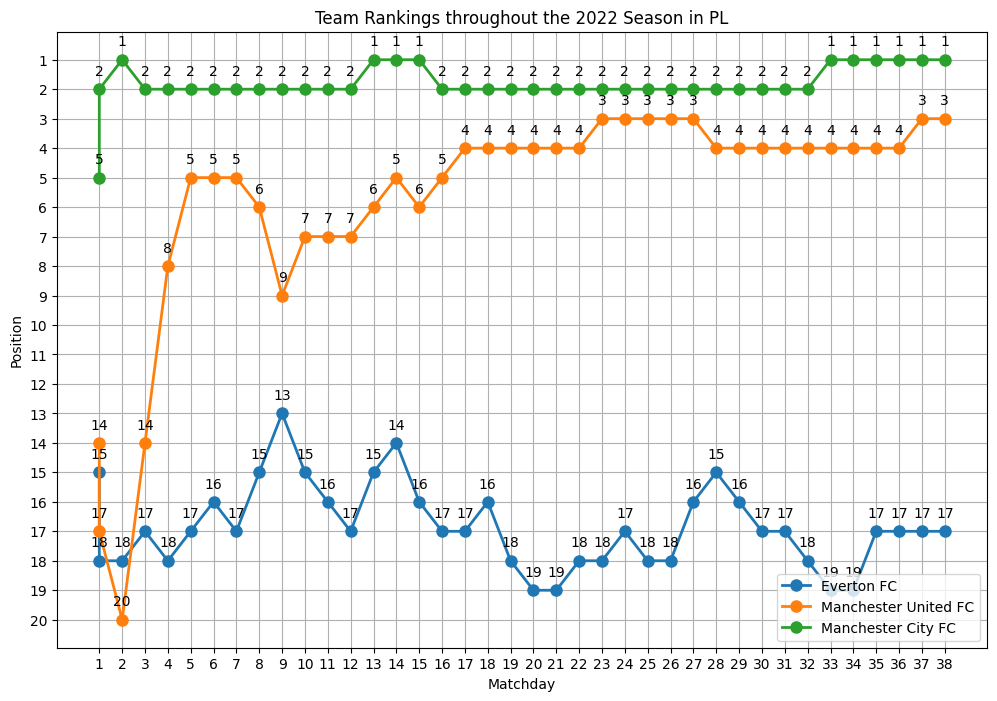

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

class Plot_Ranking_Progression:
    """
    A class to plot the rankings progression for selected teams in a specific league and season.
    """

    def __init__(self, season, league_code, team_names):
        """
        Initialize the class with season, league code, and team names.

        Parameters:
        season: The desired year.
        league_code: The code of the league.
        team_names: A list of team names to plot.
        """
        self.season = season
        self.league_code = league_code
        self.team_names = team_names
        self.file_path = f'data/{league_code}_{season}.csv'
        self.standings_df = pd.read_csv(self.file_path)
        self.total_matchdays, self.max_position = self.get_league_details()

    def get_league_details(self):
        """
        Determine the total matchdays and max position based on the league code.

        Returns:
        tuple: total_matchdays, max_position
        """
        if self.league_code in ['PD', 'PL', 'SA']:
            return 38, 20
        elif self.league_code in ['BL1', 'FL1']:
            return 34, 18
        else:
            raise ValueError("Unsupported league code")

    def plot_team_rankings(self):
        """
        Plot the rankings progression for selected teams throughout the season.
        """
        plt.figure(figsize=(12, 8))

        for team_name in self.team_names:
            team_data = self.standings_df[self.standings_df['team_name'] == team_name]

            if not team_data.empty:
                # Plot the ranking progression for each team
                plt.plot(team_data['matchday'], team_data['position'], marker='o', linestyle='-', linewidth=2, markersize=8, label=team_name)
                
                # Annotate positions on the graph
                for idx, row in team_data.iterrows():
                    plt.annotate(row['position'], (row['matchday'], row['position']), textcoords="offset points", xytext=(0,10), ha='center')
            else:
                print(f"No data found for team {team_name}")

        plt.gca().invert_yaxis()  
        plt.title(f"Team rankings throughout the {self.season} season in {self.league_code}")
        plt.xlabel("Matchday")
        plt.ylabel("Position")
        plt.grid(True)
        plt.xticks(range(1, self.total_matchdays + 1))  
        plt.yticks(range(1, self.max_position + 1))  
        plt.legend(loc='lower right')  
        plt.show()


if __name__ == "__main__":
    season = '2022'
    league_code = 'PL'
    team_names = ['Everton FC', 'Manchester United FC', 'Manchester City FC']
    
    
    plotter = Plot_Ranking_Progression(season, league_code, team_names)
    
    # Plot the team rankings progression for the selected teams
    plotter.plot_team_rankings()


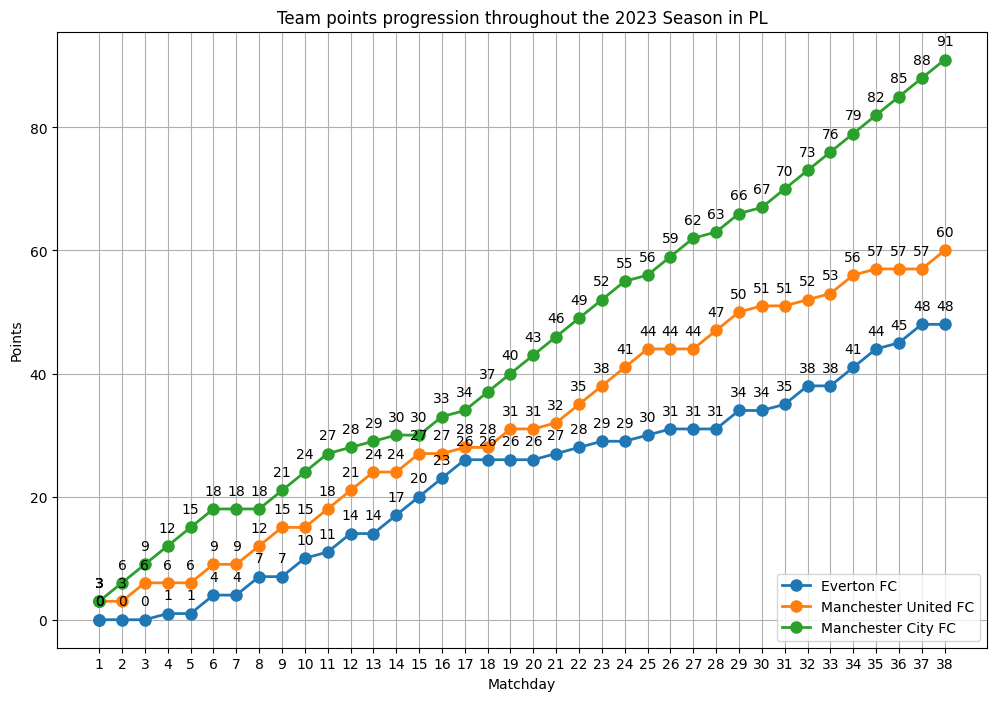

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

class Plot_Point_Progression:
    """
    A class to plot the points progression for selected teams in a specific league and season.
    """

    def __init__(self, season, league_code, team_names):
        """
        Initialize the class with season, league code, and team names.

        Parameters:
        season: The desired year.
        league_code: The code of the league.
        team_names: A list of team names to plot.
        """
        self.season = season
        self.league_code = league_code
        self.team_names = team_names
        self.file_path = f'data/{league_code}_{season}.csv'
        self.standings_df = pd.read_csv(self.file_path)
        self.total_matchdays, self.max_position = self.get_league_details()

    def get_league_details(self):
        """
        Determine the total matchdays and max position based on the league code.

        Returns:
        tuple: total_matchdays, max_position
        """
        if self.league_code in ['PD', 'PL', 'SA']:
            return 38, 20
        elif self.league_code in ['BL1', 'FL1']:
            return 34, 18
        else:
            raise ValueError("Unsupported league code")

    def plot_points_progression(self):
        """
        Plot the points progression for selected teams from a league.
        """
        plt.figure(figsize=(12, 8))

        for team_name in self.team_names:
            team_data = self.standings_df[self.standings_df['team_name'] == team_name]

            if not team_data.empty:
                # Plot the points progression for each team
                plt.plot(team_data['matchday'], team_data['points'], marker='o', linestyle='-', linewidth=2, markersize=8, label=team_name)
                
                # Annotate points on the graph
                for idx, row in team_data.iterrows():
                    plt.annotate(row['points'], (row['matchday'], row['points']), textcoords="offset points", xytext=(0,10), ha='center')
            else:
                print(f"No data found for team {team_name}")

        plt.title(f"Team points progression throughout the {self.season} Season in {self.league_code}")
        plt.xlabel("Matchday")
        plt.ylabel("Points")
        plt.grid(True)
        plt.xticks(range(1, self.total_matchdays + 1))  
        plt.legend(loc='lower right')  
        plt.show()


if __name__ == "__main__":
    season = '2023'
    league_code = 'PL'
    team_names = ['Everton FC', 'Manchester United FC', 'Manchester City FC']
    
    
    plotter = Plot_Point_Progression(season, league_code, team_names)
    
    # Plot the points progression for the selected teams
    plotter.plot_points_progression()


In [175]:
import pandas as pd
from tabulate import tabulate

class Print_TopScorers:
    """
    A class to print the top scorers table.
    """

    def __init__(self, season, league_code):
        """
        Initialize the class with season and league code.

        Parameters:
        season: The desired year.
        league_code: The code of the league.
        """
        self.season = season
        self.league_code = league_code
        self.file_path = f'data/{league_code}_{season}_Topscorers.csv'

    def load_data(self):
        """
        Load the top scorers data from the CSV file.

        Returns:
        DataFrame: A pandas data frame containing the top scorers data.
        """
        top_scorers_df = pd.read_csv(self.file_path)
        top_scorers_df.index += 1
        return top_scorers_df

    def print_table(self):
        """
        Print the top scorers table.
        """
        top_scorers_df = self.load_data()
        pd.set_option('display.max_columns', None)
        pd.set_option('display.expand_frame_repr', False)
        table = tabulate(top_scorers_df, headers='keys', tablefmt='fancy_grid')
        print(table)


if __name__ == "__main__":
    # Select the desired league and season
    season = '2022'
    league_code = 'FL1'
    
    
    printer = Print_TopScorers(season, league_code)

    # Print the top scorers table
    printer.print_table()


╒════╤═════════════════════╤════════════════════════╤═════════╕
│    │ player              │ team                   │   goals │
╞════╪═════════════════════╪════════════════════════╪═════════╡
│  1 │ Kylian Mbappé       │ Paris Saint-Germain FC │      29 │
├────┼─────────────────────┼────────────────────────┼─────────┤
│  2 │ Alexandre Lacazette │ Olympique Lyonnais     │      27 │
├────┼─────────────────────┼────────────────────────┼─────────┤
│  3 │ Jonathan David      │ Lille OSC              │      24 │
├────┼─────────────────────┼────────────────────────┼─────────┤
│  4 │ Folarin Balogun     │ Stade de Reims         │      21 │
├────┼─────────────────────┼────────────────────────┼─────────┤
│  5 │ Loïs Openda         │ Racing Club de Lens    │      21 │
├────┼─────────────────────┼────────────────────────┼─────────┤
│  6 │ Habib Diallo        │ RC Strasbourg Alsace   │      20 │
├────┼─────────────────────┼────────────────────────┼─────────┤
│  7 │ Sepe Elye Wahi      │ Montpellier

In [ ]:
import requests
import pandas as pd
import time

class Download_TopScorers:
    """
    A class to download top scorers data for a specific league and season.
    """

    def __init__(self, api_token):
        """
        Initialize the Download_TopScorers class with the API token.

        Parameters:
        api_token: The API token for authentication.
        """
        self.api_token = api_token
        self.headers = {'X-Auth-Token': api_token}

    def get_top_scorers(self, season, league_code):
        """
        Fetch the top scorers for a given league and season.

        Parameters:
        season: The desired year.
        league_code: The code of the league.

        Returns:
        list: A list of dictionaries containing top scorers' data.
        """
        url = f'https://api.football-data.org/v4/competitions/{league_code}/scorers'
        params = {'season': season}
        response = requests.get(url, headers=self.headers, params=params)
        
        if response.status_code == 200:
            data = response.json()
            print(data)  
            top_scorers = []
            for scorer in data['scorers']:
                player = scorer['player']['name']
                team = scorer['team']['name']
                goals = scorer['goals']
                top_scorers.append({
                    'player': player,
                    'team': team,
                    'goals': goals
                })
            return top_scorers
        else:
            print(f"Failed to retrieve top scorers: {response.status_code}")
            if response.status_code == 429:
                # If rate limit exceeded, wait and retry
                time.sleep(10)
            return []

    def save_top_scorers_to_csv(self, season, league_code):
        """
        Save the top scorers data for a specified season and league to a CSV file.

        Parameters:
        season: The season year.
        league_code: The code of the league.
        """
        top_scorers = self.get_top_scorers(season, league_code)
        if top_scorers:
            top_scorers_df = pd.DataFrame(top_scorers)
            csv_filename = f'{league_code}_{season}_Topscorers.csv'
            top_scorers_df.to_csv(csv_filename, index=False)
            print(f"Data saved to '{csv_filename}'")
        else:
            print("No data to save.")


if __name__ == "__main__":
    # Parameters for the season and league
    api_token = '93bdb2d473a847969e73438dd4064fea'
    season = '2020'
    league_code = 'SA'
    
    
    downloader = Download_TopScorers(api_token)

    # Save the top scorers data to a CSV file
    downloader.save_top_scorers_to_csv(season, league_code)


In [ ]:
import requests
import pandas as pd
import time

class DownloadData:
    """
    A class to download match data for a specific league and season.
    """

    def __init__(self, api_token):
        """
        Initialize the DownloadData class with the API token.

        Parameters:
        api_token: The API token for authentication.
        """
        self.api_token = api_token
        self.headers = {'X-Auth-Token': api_token}
        self.base_url = 'http://api.football-data.org/v4/competitions'

    def fetch_match_data(self, league_code, season, matchday):
        """
        Fetch match data for a given league, season, and matchday.

        Parameters:
        league_code: The code of the league.
        season: The desired year.
        matchday: The matchday number.

        Returns:
        dict: The JSON response containing match data.
        """
        url = f'{self.base_url}/{league_code}/matches'
        params = {'season': season, 'matchday': matchday}
        retries = 5
        backoff_factor = 1
        
        # Try fetching the data up to a maximum number of retries
        for i in range(retries):
            response = requests.get(url, headers=self.headers, params=params, timeout=10)
            if response.status_code == 200:
                return response.json()
            elif response.status_code == 429:
                # If rate limit exceeded, wait and retry
                time.sleep(backoff_factor * (2 ** i))
                continue
            else:
                return None
        print(f"Failed to retrieve data for matchday {matchday} after {retries} retries.")
        return None

    def save_match_data_to_csv(self, league_code, season, start_matchday, end_matchday):
        """
        Save match data for a range of matchdays to a CSV file.

        Parameters:
        league_code: The code of the league.
        season: The desired year.
        start_matchday: The starting matchday number.
        end_matchday: The ending matchday number.
        """
        all_matches = []
        # Loop through each matchday in the specified range
        for matchday in range(start_matchday, end_matchday + 1):
            match_data = self.fetch_match_data(league_code, season, matchday)
            if match_data and 'matches' in match_data:
                all_matches.extend(match_data['matches'])
            else:
                print(f"No data found for matchday {matchday}")
            time.sleep(2)  
        
        if all_matches:
            # Convert the match data to a DataFrame and save it to a CSV file
            matches_df = pd.json_normalize(all_matches)
            csv_filename = f'{league_code}_{season}_matchdays_{start_matchday}_to_{end_matchday}.csv'
            matches_df.to_csv(csv_filename, index=False)
            print(f"Data for matchdays {start_matchday} to {end_matchday} saved to '{csv_filename}'")

# Main part to save match data for a given season and league in portions
if __name__ == "__main__":
    # Parameters for the season and matchdays
    api_token = '93bdb2d473a847969e73438dd4064fea'
    league_code = 'BL1'
    season = '2020'
    total_matchdays = 38 if league_code in ['PL', 'PD', 'SA'] else 34

    # Size of portions to download data in chunks
    portion_size = 5

    
    downloader = DownloadData(api_token)

    # Loop through matchdays in chunks and save data to CSV files
    for start_matchday in range(1, total_matchdays + 1, portion_size):
        end_matchday = min(start_matchday + portion_size - 1, total_matchdays)
        downloader.save_match_data_to_csv(league_code, season, start_matchday, end_matchday)


In [ ]:
import requests
import pandas as pd
import os
import time

class DownloadData_Manual:
    """
    A class to manually download datasets for specific matchdays that fail to be downloaded by previous code.
    """
    
    def __init__(self, api_token):
        """
        Initialize the DownloadData_Manual class with the API token.

        Parameters:
        api_token (str): The API token for authentication.
        """
        self.api_token = api_token
        self.headers = {'X-Auth-Token': api_token}
        self.base_url = 'http://api.football-data.org/v4/competitions'

    def fetch_match_data(self, league_code, season, matchday):
        """
        Fetch match data for a given league, season, and matchday.

        Parameters:
        league_code: The code of the league.
        season: The desired year.
        matchday: The matchday number.

        Returns:
        dict: The JSON response containing match data.
        """
        url = f'{self.base_url}/{league_code}/matches'
        params = {'season': season, 'matchday': matchday}
        retries = 5
        backoff_factor = 1
        
        # Try fetching the data up to a maximum number of retries
        for i in range(retries):
            response = requests.get(url, headers=self.headers, params=params, timeout=10)
            if response.status_code == 200:
                return response.json()
            elif response.status_code == 429:
                # If rate limit exceeded, wait and retry
                time.sleep(backoff_factor * (2 ** i))
                continue
            else:
                return None
        print(f"Failed to retrieve data for matchday {matchday} after {retries} retries.")
        return None

    def save_matchday_data_to_csv(self, league_code, season, matchday):
        """
        Save match data for a specific matchday to a CSV file.

        Parameters:
        league_code: The code of the league.
        season: The desired year.
        matchday: The matchday number.
        """
        match_data = self.fetch_match_data(league_code, season, matchday)
        if match_data and 'matches' in match_data:
            matches_df = pd.json_normalize(match_data['matches'])
            csv_filename = f'{league_code}_{season}_matchday_{matchday}.csv'
            matches_df.to_csv(csv_filename, index=False)
            print(f"Data for matchday {matchday} saved to '{csv_filename}'")
        else:
            print(f"No data found for matchday {matchday}")

# Main part to save match data for a given season, league, and matchday
if __name__ == "__main__":
    # Parameters for the season and matchdays
    api_token = '93bdb2d473a847969e73438dd4064fea'
    league_code = 'BL1'
    season = '2020'
    matchday = 24
    
    
    downloader = DownloadData_Manual(api_token)

    # Save matchday data to CSV
    downloader.save_matchday_data_to_csv(league_code, season, matchday)


In [ ]:
import os
import pandas as pd

class Merge_Sort:
    """
    A class to merge and sort CSV files based on the 'matchday' column.
    """

    def __init__(self, file_prefix, output_filename):
        """
        Initialize the class with file prefix and output filename.

        Parameters:
        file_prefix: The prefix of the files to be merged.
        output_filename: The name of the output CSV file.
        """
        self.file_prefix = file_prefix
        self.output_filename = output_filename

    def merge_and_sort_csv_files(self):
        """
        Merge and sort CSV files based on the 'matchday' column.
        """
        data_frames = []

        # Loop through each file in the current directory
        for file in os.listdir():
            if file.endswith('.csv') and file.startswith(self.file_prefix):
                file_path = file
                df = pd.read_csv(file_path)
                data_frames.append(df)

        # Concatenate all data frames into a single data frame
        merged_df = pd.concat(data_frames, ignore_index=True)

        # Sort the merged data frame by the 'matchday' column
        sorted_df = merged_df.sort_values(by='matchday')

        # Save the sorted data frame to a CSV file
        sorted_df.to_csv(self.output_filename, index=False)

        print(f"Sorted data saved to '{self.output_filename}'")

if __name__ == "__main__":
    
    merger = Merge_Sort(file_prefix='BL1_2020', output_filename='BL1_2020_sorted.csv')
    
    # Merge and sort the CSV files
    merger.merge_and_sort_csv_files()


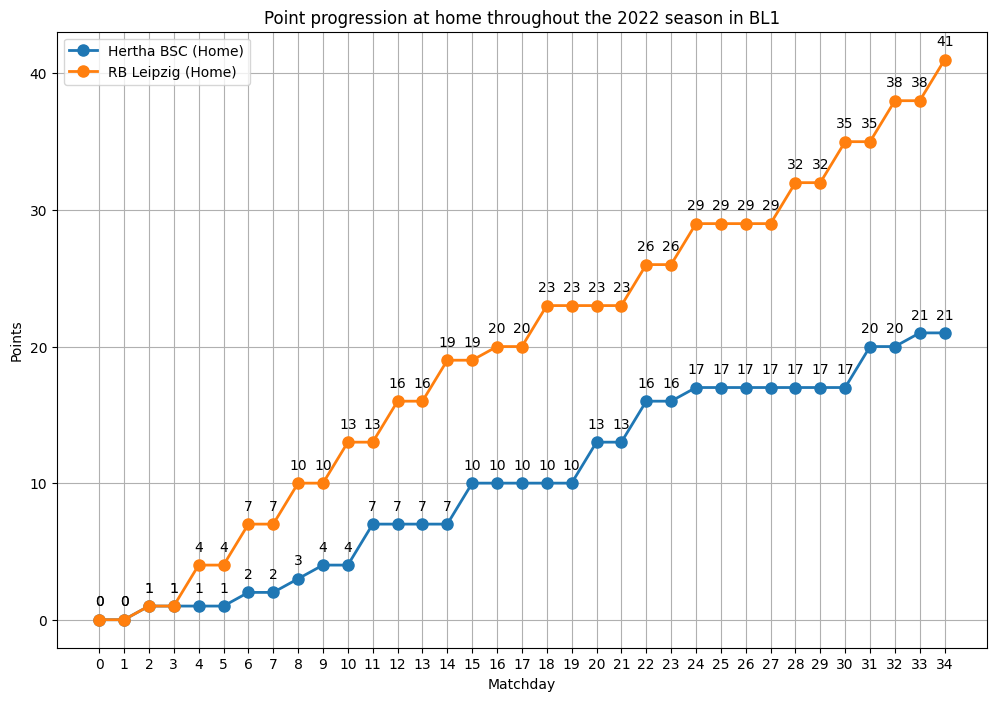

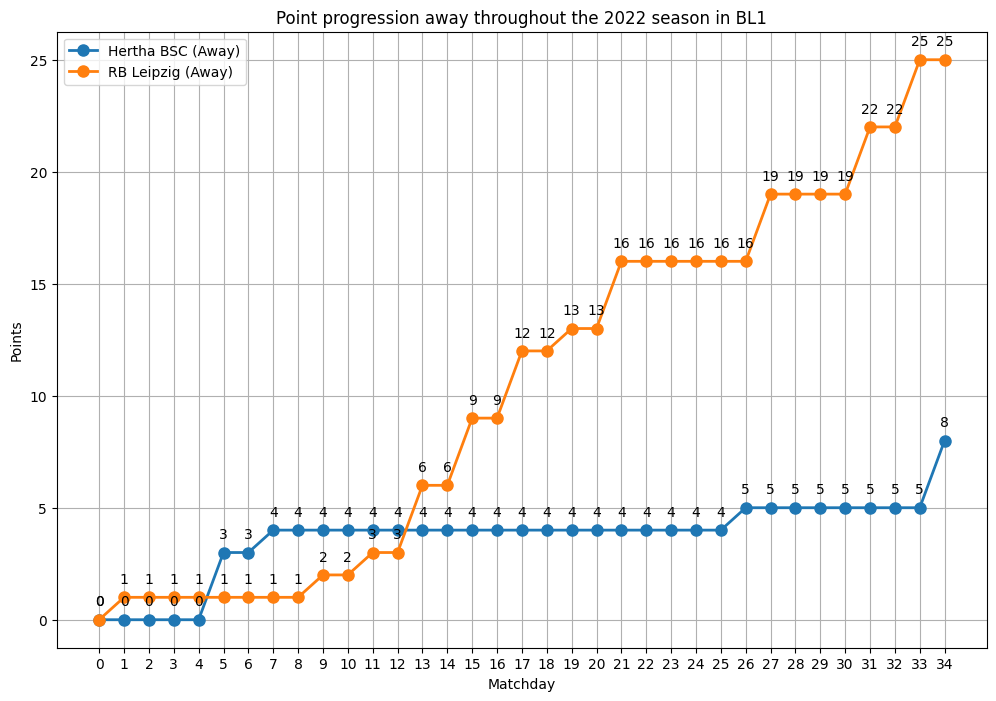

In [181]:
import pandas as pd
import matplotlib.pyplot as plt

class Plot_Home_Away:
    """
    A class to plot the points progression for home and away matches for selected teams throughout a season.
    """

    def __init__(self, league_code, season, team_names):
        """
        Initialize the class with the league code, season, and team names.

        Parameters:
        league_code: The code of the league.
        season: The season year.
        team_names: A list of team names to plot.
        """
        self.league_code = league_code
        self.season = season
        self.team_names = team_names
        self.file_path = f'data/{league_code}_{season}_sorted.csv'
        self.total_matchdays = 38 if league_code in ['PL', 'PD', 'SA'] else 34
        self.matches_df = pd.read_csv(self.file_path)

    def process_match_data(self, matches_df):
        """
        Process match data to calculate home and away points for each team.

        Parameters:
        matches_df: A pandas data frame containing the match data.

        Returns:
        tuple: Two dictionaries containing points for home and away teams respectively.
        """
        home_points = {}
        away_points = {}
        
        for _, match in matches_df.iterrows():
            home_team = match['homeTeam.name']
            away_team = match['awayTeam.name']
            home_score = match['score.fullTime.home']
            away_score = match['score.fullTime.away']
            
            if home_score > away_score:
                home_points[home_team] = home_points.get(home_team, 0) + 3
                away_points[away_team] = away_points.get(away_team, 0)
            elif home_score < away_score:
                away_points[away_team] = away_points.get(away_team, 0) + 3
                home_points[home_team] = home_points.get(home_team, 0)
            else:
                home_points[home_team] = home_points.get(home_team, 0) + 1
                away_points[away_team] = away_points.get(away_team, 0) + 1
        
        return home_points, away_points

    def plot_points_progression(self):
        """
        Plot the points progression for home and away matches for selected teams.
        """
        home_points_progression = {team: [0] for team in self.team_names}
        away_points_progression = {team: [0] for team in self.team_names}
        
        for matchday in range(1, self.total_matchdays + 1):
            matchday_matches = self.matches_df[self.matches_df['matchday'] == matchday]
            home_points, away_points = self.process_match_data(matchday_matches)
            
            for team in self.team_names:
                home_points_progression[team].append(home_points_progression[team][-1] + home_points.get(team, 0))
                away_points_progression[team].append(away_points_progression[team][-1] + away_points.get(team, 0))
        
        plt.figure(figsize=(12, 8))
        for team in self.team_names:
            plt.plot(range(0, self.total_matchdays + 1), home_points_progression[team], 
                     marker='o', linestyle='-', linewidth=2, markersize=8, label=f'{team} (Home)')
            for i, txt in enumerate(home_points_progression[team]):
                plt.annotate(txt, (i, home_points_progression[team][i]), textcoords="offset points", xytext=(0,10), ha='center')
        plt.title(f"Point progression at home throughout the {self.season} season in {self.league_code}")
        plt.xlabel("Matchday")
        plt.ylabel("Points")
        plt.grid(True)
        plt.xticks(range(0, self.total_matchdays + 1))
        plt.legend(loc='best')
        plt.show()
        
        plt.figure(figsize=(12, 8))
        for team in self.team_names:
            plt.plot(range(0, self.total_matchdays + 1), away_points_progression[team], marker='o', linestyle='-', linewidth=2, markersize=8, label=f'{team} (Away)')
            for i, txt in enumerate(away_points_progression[team]):
                plt.annotate(txt, (i, away_points_progression[team][i]), textcoords="offset points", xytext=(0,10), ha='center')
        plt.title(f"Point progression away throughout the {self.season} season in {self.league_code}")
        plt.xlabel("Matchday")
        plt.ylabel("Points")
        plt.grid(True)
        plt.xticks(range(0, self.total_matchdays + 1))
        plt.legend(loc='best')
        plt.show()


if __name__ == "__main__":
    season = '2022'
    league_code = 'BL1'
    team_names = ['Hertha BSC', 'RB Leipzig']
    
    
    plotter = Plot_Home_Away(league_code, season, team_names)
    
    # Plot the points progression for the selected teams
    plotter.plot_points_progression()
